<a href="https://colab.research.google.com/github/LuisDevil72/Prueba/blob/main/TRANSFERENCIA_APRENDIZAJE/Transferencia_de_aprendizaje_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/train"
test_dir = "/content/drive/MyDrive/test"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=IMAGE_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")




Training images:
Found 50 images belonging to 5 classes.
Testing images:
Found 50 images belonging to 5 classes.


In [ ]:
imgs, labels = next(train_data)

In [ ]:
labels.shape

(32, 5)

In [ ]:
def plotImages(images_arr):
  fig, axes=plt.subplots(1,10,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()


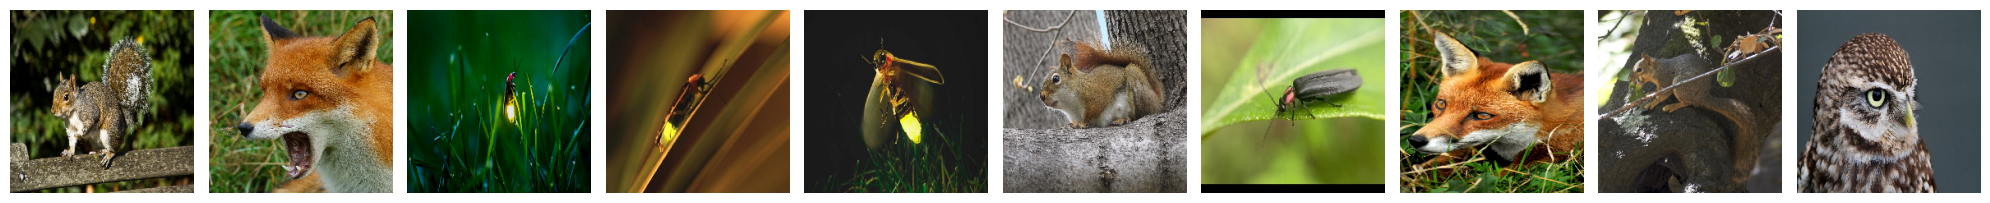

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)



In [ ]:
pre_trained_model = VGG16(input_shape=IMAGE_SIZE+(3,),weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
pre_trained_model.trainable = False

In [ ]:
pre_trained_model.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
pre_trained_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
x = Flatten()(pre_trained_model.output)
x = Dense(2048,activation='relu')(x)
x = Dense(512,activation='relu')(x)
#x = Dense(128,activation='relu')(x)
#x = Dense(128,activation='relu')(x)
x = Dense(16,activation='sigmoid')(x)
predicciones = Dense(5,activation='softmax')(x)

In [ ]:
modelo = Model(inputs=pre_trained_model.input,outputs=predicciones)
modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
modelo.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [ ]:
history=modelo.fit(train_data,validation_data=test_data,epochs=50,batch_size=100)

Epoch 1/50
2/2 [==============================] - 37s 27s/step - loss: 1.7623 - accuracy: 0.2200 - val_loss: 1.6188 - val_accuracy: 0.3600
Epoch 2/50
2/2 [==============================] - 1s 1s/step - loss: 1.5563 - accuracy: 0.3800 - val_loss: 1.5342 - val_accuracy: 0.3400
Epoch 3/50
2/2 [==============================] - 1s 813ms/step - loss: 1.4912 - accuracy: 0.4200 - val_loss: 1.5664 - val_accuracy: 0.2400
Epoch 4/50
2/2 [==============================] - 1s 998ms/step - loss: 1.4367 - accuracy: 0.5200 - val_loss: 1.4560 - val_accuracy: 0.5400
Epoch 5/50
2/2 [==============================] - 1s 848ms/step - loss: 1.3720 - accuracy: 0.6400 - val_loss: 1.5109 - val_accuracy: 0.2000
Epoch 6/50
2/2 [==============================] - 2s 2s/step - loss: 1.3911 - accuracy: 0.4800 - val_loss: 1.4090 - val_accuracy: 0.6600
Epoch 7/50
2/2 [==============================] - 2s 1s/step - loss: 1.2329 - accuracy: 0.8800 - val_loss: 1.3752 - val_accuracy: 0.6400
Epoch 8/50
2/2 [==============

In [ ]:
modelo.save('./content/drive/MyDrive/model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.preprocessing import image
img_path='/content/drive/MyDrive/test/luciernaga/luc17.jpg'

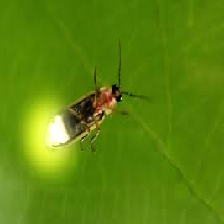

In [ ]:
img = image.load_img(img_path,target_size=(224,224))
img

In [ ]:
X = image.img_to_array(img)
X = np.expand_dims(X,axis=0)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
X=preprocess_input(X)
preds = modelo.predict(X)

1/1 [==============================] - 1s 1s/step


In [ ]:
preds.shape

(1, 5)

In [ ]:
preds

array([[0.03942862, 0.21200965, 0.04964924, 0.28132546, 0.41758704]],
      dtype=float32)

In [ ]:
np.argmax(preds,axis=1)

array([4])

In [ ]:
imgs, labels = next(test_data)


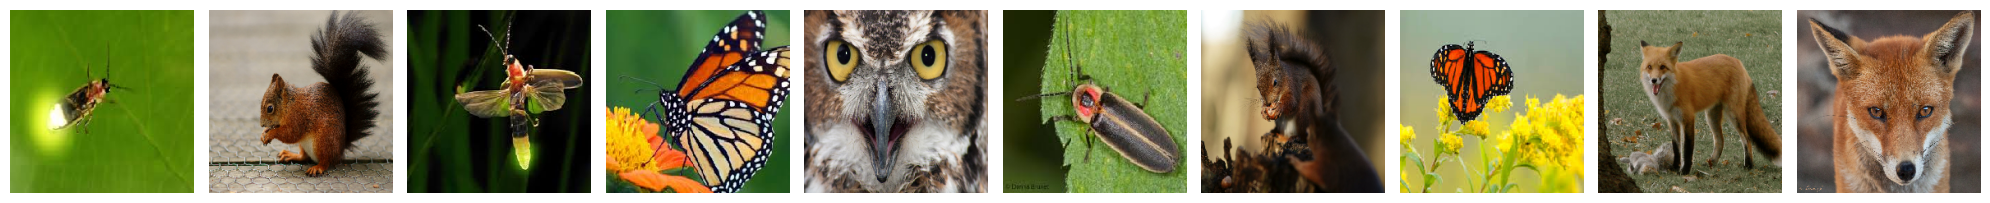

[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


In [ ]:
plotImages(imgs)
print(labels)
# Etiquetas
# 0 => ardilla 1=>luciernaga 2=>mariposa 3=>tecolote 4=>zorro

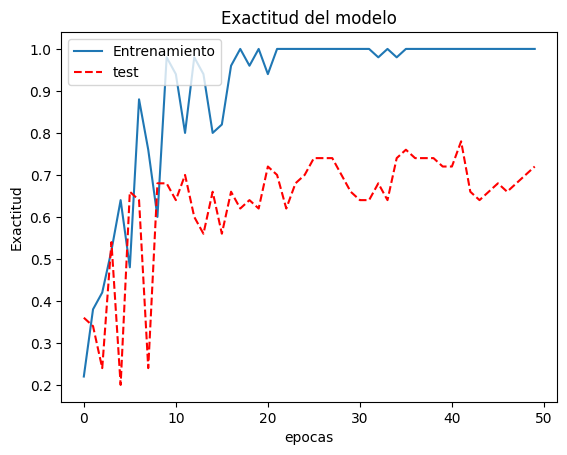

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r--')
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

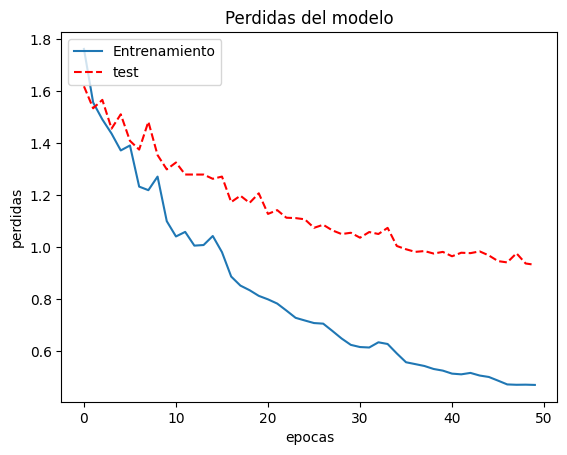

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()